In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  # TF model

In [2]:
%store -r train_features
%store -r test_features

%store -r train_labels
%store -r test_labels

The tf.keras.layers.Normalization adding a feature normalization into the model.

Create the layer

In [3]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Fit the state of the preprocessing layer to the data

In [4]:
normalizer.adapt(np.array(train_features))

2022-06-16 15:58:01.033013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /sw/arch/Debian10/EB_production/2021/software/Qhull/2020.2-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/core/lib:/sw/arch/Debian10/EB_production/2021/software/PyTorch/1.10.0-foss-2021a-CUDA-11.3.1/lib/python3.9/site-packages/torch/lib:/sw/arch/Debian10/EB_production/2021/software/magma/2.6.1-foss-2021a-CUDA-11.3.1/lib:/sw/arch/Debian10/EB_production/2021/software/FFmpeg/4.3.2-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/FriBidi/1.0.10-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/x265/3.5-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/LAME/3.100-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/x2

Calculating the mean and variance, and storing them in the layer:

In [5]:
print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

[[4.5719843e+00 8.5137823e+02 7.1319043e+02 5.0751388e-01 5.8288473e-01
  2.7596102e+04 2.2877213e+04]]
First example: [[   0 1373 1144    1    1  167 3748]]

Normalized: [[-0.09  1.05  0.31  0.99  0.85 -0.37 -0.18]]


# 1. LINEAR REGRESSION (single input)

In [11]:
totalviews = np.array(train_features['TotalViews'])
totalviews_normalizer = layers.Normalization(input_shape=[1, ], axis=None)
totalviews_normalizer.adapt(totalviews)

totalviews_model = tf.keras.Sequential([
    totalviews_normalizer,
    layers.Dense(units=1)
])

totalviews_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


For Mean Absolute Error

In [ ]:
totalviews_model.predict(totalviews[:10])

totalviews_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanAbsoluteError())

history = totalviews_model.fit(
    train_features['TotalViews'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split=0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

For Mean Squared Error

In [339]:
totalviews_model.predict(totalviews[:10])

totalviews_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError())

history = totalviews_model.fit(
    train_features['TotalViews'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split=0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,21356.267578,24979.335938,95
96,21360.800781,24978.410156,96
97,21356.554688,24978.166016,97
98,21370.371094,24977.312500,98
99,21352.304688,24966.128906,99


In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [TotalViews]')
    plt.legend()
    plt.grid(True)

Mean Absolute Error

In [ ]:
plot_loss(history)
plt.show()

Mean Squared Error Loss

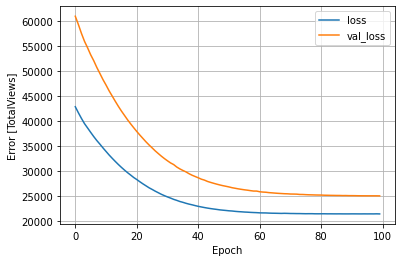

In [342]:
plot_loss(history)
plt.show()

In [85]:
test_results = {}

test_results['totalviews_model'] = totalviews_model.evaluate(
    test_features['TotalViews'],
    test_labels, verbose=0)

x = tf.linspace(0.0, 5000000, 5000001)
y = totalviews_model.predict(x)

%store test_results

In [343]:
test_results_MSE = {}

test_results_MSE['totalviews_model'] = totalviews_model.evaluate(
    test_features['TotalViews'],
    test_labels, verbose=0)

x = tf.linspace(0.0, 5000000, 5000001)
y = totalviews_model.predict(x)

%store test_results_MSE

In [88]:
def plot_totalviews(x, y):
    plt.scatter(train_features['TotalViews'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('TotalViews')
    plt.ylabel('TotalVotes')
    plt.legend()

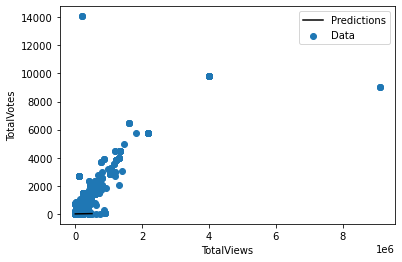

In [74]:
plot_totalviews(x, y)
plt.show()